# Causal Inference

## **IHDP Data**

In [ ]:
# importing the Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#loading the IHDP data 
data = pd.read_csv("ihdp.csv")
display(data.head(10))

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591
5,-0.353512,0.196818,0.756191,-0.879606,-0.004017,-1.354634,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.753738,5.876451,4.662679
6,1.094769,0.996346,-1.477987,-0.879606,0.746189,2.288910,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.208155,10.171004,1.009987
7,-0.396744,-0.602710,0.756191,-0.879606,-1.441913,-0.029709,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.630186,2.482442,4.404516
8,0.057195,0.196818,-0.360898,0.161703,0.121017,-1.023402,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.258308,6.179534,4.547982
9,0.813759,0.596582,0.011465,0.161703,0.183534,-0.857787,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.311237,6.550791,4.566637


In [ ]:
# Descriptive statistics
data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
count,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,3.626431e-17,2.348263e-17,-4.666801e-17,-9.012574e-16,4.518177e-17,-7.251376e-16,0.514056,0.093708,0.520750,0.364123,0.269076,0.219545,0.358768,0.463186,0.140562,0.959839,0.594378,0.963855,0.135207,0.135207,0.156627,0.081660,0.073628,0.128514,0.157965,0.186078,3.159538,5.696107,4.016067
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500137,0.291618,0.499904,0.481506,0.443777,0.414216,0.479960,0.498977,0.347802,0.196467,0.491341,0.186775,0.342174,0.342174,0.363692,0.274029,0.261339,0.334886,0.364953,0.389430,2.179956,1.980121,0.859736
min,-2.731287e+00,-3.800823e+00,-1.850350e+00,-8.796060e-01,-5.130428e+00,-1.851480e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.543902,-1.037628,-1.866989
25%,-6.669461e-01,-6.027100e-01,-7.332610e-01,-8.796060e-01,-5.666720e-01,-8.577868e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626779,5.053598,3.775936
50%,1.652752e-01,1.968181e-01,-3.608980e-01,1.617025e-01,1.210172e-01,-2.970882e-02,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.577294,6.209686,4.304433
75%,8.137593e-01,5.965822e-01,7.561910e-01,1.617025e-01,6.836721e-01,6.327536e-01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.494637,6.948922,4.569454
max,1.505476e+00,2.595403e+00,2.990369e+00,2.244320e+00,2.371637e+00,2.951372e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.268228,10.171004,4.670125


In [ ]:
# checking for Null Data
data.isna().any().sum()

0

In [ ]:
# Checking for Duplicacy in the data
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
742    False
743    False
744    False
745    False
746    False
Length: 747, dtype: bool

In [ ]:
#Checking the last five rows
data.tail()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
742,-1.853672,-2.201766,1.500917,0.161703,-0.129052,-1.023402,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.244050,5.269701,4.598246
743,-1.066845,-1.402238,1.128554,2.244320,0.371086,2.288910,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.253175,8.393338,0.940855
744,-1.045229,-1.337276,1.128554,-0.879606,0.683672,0.301522,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.908235,6.897207,4.373736
745,-0.115735,-0.602710,-1.105624,2.244320,0.558638,2.785756,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.324520,9.208251,0.352653
746,1.419011,1.396110,-0.733261,2.244320,-0.441638,-0.195324,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.915644,6.298299,4.115977


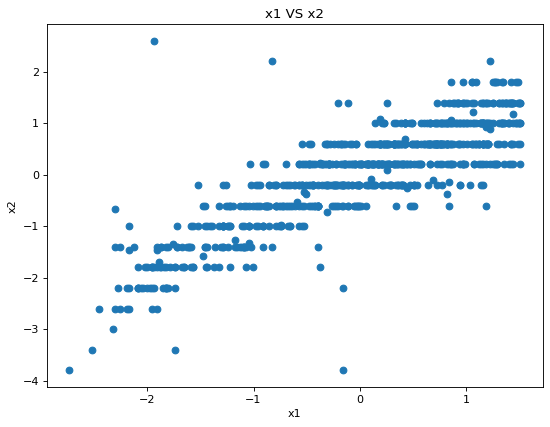

In [ ]:
# Checking if data is Linear
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.scatter(data['x1'], data['x2'])
plt.title("x1 VS x2") 
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
from sklearn import linear_model, metrics


In [ ]:
# Defining the Independednt and dependent Variable
X = data.x1
y = data.x2

In [ ]:
X = X.values.reshape(-1,1)


In [ ]:
y= y.values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split                                                

In [ ]:
# Splitting the datast for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=1)  

In [ ]:
# Creating object for Linear Regression
Lreg = linear_model.LinearRegression()

In [ ]:
# Fitting the Model
Lreg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Finding the Coeeficients
print('Coefficients: ', Lreg.coef_)
b = Lreg.coef_

Coefficients:  [[0.85769109]]


In [ ]:
# Checking Variance Score
print('Variance score: {}'.format(Lreg.score(X_test, y_test)))

Variance score: 0.6722779733796281


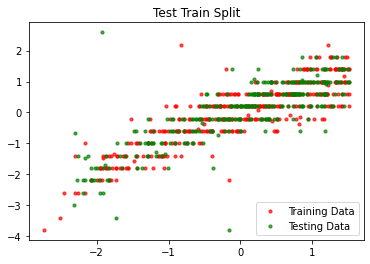

In [ ]:
# Testing and Training The data
plt.scatter(X_train,y_train, label='Training Data', color= 'r',s = 10, alpha=.7)
plt.scatter(X_test,y_test, label='Testing Data', color= 'g',s = 10, alpha=.7)
plt.legend()
plt.title('Test Train Split')
plt.show()

In [ ]:
#Cheking Score of Train data
Lreg.score(X_train,y_train)

0.7482289552775148

In [ ]:
#Cheking Score of Test data
Lreg.score(X_test,y_test)

0.6722779733796281

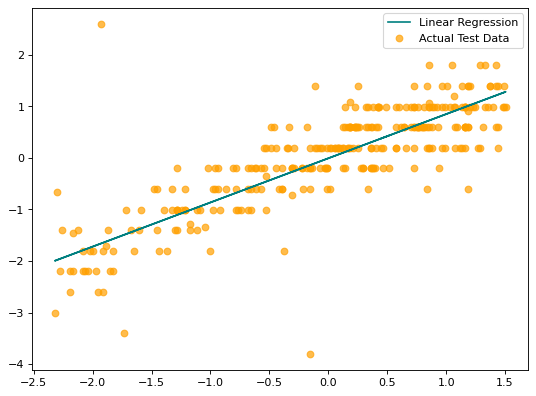

In [ ]:
# Plotting the Prediction
figure(figsize=(8, 6), dpi=80)
prediction = Lreg.predict(X_test)
plt.plot(X_test, prediction, label = "Linear Regression", color = 'Teal')
plt.scatter(X_test,y_test, label= 'Actual Test Data',color='#FFA000',alpha=.7)
plt.legend()
plt.show()

## **Jobs Dataset**

In [ ]:
# importing the Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#loading the Jobs data 
jobs = pd.read_csv('jobs.csv')
display(jobs.head(10))

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0.0,1.0,0.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0.0,1.0,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0.0,1.0,0.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0.0,1.0,1.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0.0,1.0,0.0
5,0.138440,0.442558,0.0,0.0,1.0,0.0,2.162023,1.913100,-0.019840,-0.156019,0.345809,2.080718,1.605392,0.0,0.0,1.924029,0.0,0.0,1.0,0.0
6,-0.708372,-0.238888,1.0,0.0,1.0,1.0,-1.147411,-1.110467,-0.720617,-0.701889,-0.361348,-0.558057,-0.518815,1.0,1.0,-0.979981,0.0,0.0,1.0,1.0
7,-1.367005,-1.261057,0.0,0.0,0.0,1.0,-1.063009,-1.013806,-1.117857,-0.927646,-1.201098,-0.556341,-0.516644,0.0,0.0,-0.934404,0.0,0.0,1.0,1.0
8,-0.614282,0.442558,0.0,0.0,1.0,0.0,0.268854,-1.110467,-0.653311,-0.656913,0.345809,-0.074794,-0.518815,0.0,1.0,0.262783,0.0,0.0,1.0,0.0
9,-1.178824,-1.261057,1.0,0.0,0.0,1.0,-1.147411,-1.110467,-1.017557,-0.877667,-1.201098,-0.558057,-0.518815,1.0,1.0,-0.979981,0.0,0.0,0.0,1.0


In [ ]:
# Descriptive Statistics
jobs.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
count,3.212000e+03,3.212000e+03,3212.000000,3212.000000,3212.000000,3212.000000,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3212.000000,3212.000000,3.212000e+03,3212.000000,3212.000000,3212.000000,3212.000000
mean,2.382901e-16,-3.820971e-16,0.374222,0.048879,0.707970,0.411893,-1.200783e-16,4.956600e-17,-6.083414e-18,1.757408e-14,-2.638422e-16,-1.168292e-17,9.429291e-17,0.168742,0.167497,1.901758e-16,0.010897,0.092466,0.849938,0.224782
std,1.000000e+00,1.000000e+00,0.483997,0.215649,0.454767,0.492253,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.374582,0.373477,1.000000e+00,0.103833,0.289727,0.357188,0.417504
min,-1.461095e+00,-3.986840e+00,0.000000,0.000000,0.000000,0.000000,-1.147411e+00,-1.110467e+00,-1.164047e+00,-9.488316e-01,-2.143974e+00,-5.580568e-01,-5.188151e-01,0.000000,0.000000,-9.799811e-01,0.000000,0.000000,0.000000,0.000000
25%,-8.024627e-01,-5.796108e-01,0.000000,0.000000,0.000000,0.000000,-8.923385e-01,-9.139141e-01,-7.852843e-01,-7.434072e-01,-6.707297e-01,-5.423814e-01,-5.098380e-01,0.000000,0.000000,-8.142367e-01,0.000000,0.000000,1.000000,0.000000
50%,-3.320111e-01,1.018350e-01,0.000000,0.000000,1.000000,0.000000,-8.521244e-02,-8.346011e-02,-4.355556e-01,-4.998533e-01,-2.250229e-02,-2.862214e-01,-2.737369e-01,0.000000,0.000000,-2.035020e-01,0.000000,0.000000,1.000000,0.000000
75%,7.970728e-01,4.425579e-01,1.000000,0.000000,1.000000,1.000000,5.506613e-01,5.629081e-01,6.730184e-01,5.267384e-01,3.458087e-01,1.366588e-01,1.318304e-01,0.000000,0.000000,4.539777e-01,0.000000,0.000000,1.000000,0.000000
max,2.114337e+00,1.805449e+00,1.000000,1.000000,1.000000,1.000000,8.751987e+00,1.016507e+01,2.446737e+00,2.773336e+00,2.113702e+00,2.305284e+01,2.902264e+01,1.000000,1.000000,7.136030e+00,1.000000,1.000000,1.000000,1.000000


In [ ]:
# checking for Null Data
data.isna().any().sum()

0

In [ ]:
jobs.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3207    False
3208    False
3209    False
3210     True
3211    False
Length: 3212, dtype: bool

In [ ]:
print('The Shape of the DataFrame is :\n', jobs)

The Shape of the DataFrame is :
             x1        x2   x3   x4   x5   x6  ...  x15       x16  x17    t    y    e
0    -0.614282  1.464727  0.0  0.0  1.0  0.0  ...  0.0  2.843909  0.0  0.0  1.0  0.0
1    -0.802463  0.101835  0.0  0.0  1.0  0.0  ...  0.0  0.038422  0.0  0.0  1.0  0.0
2    -0.896553 -0.238888  1.0  0.0  1.0  1.0  ...  0.0 -0.191304  0.0  0.0  1.0  0.0
3    -0.896553 -0.238888  0.0  0.0  0.0  1.0  ...  0.0  0.173108  0.0  0.0  1.0  1.0
4     0.138440 -1.601779  1.0  0.0  1.0  1.0  ...  0.0 -0.779227  0.0  0.0  1.0  0.0
...        ...       ...  ...  ...  ...  ...  ...  ...       ...  ...  ...  ...  ...
3207  1.737976  1.805449  0.0  0.0  1.0  0.0  ...  1.0  5.197260  0.0  0.0  0.0  0.0
3208 -0.520192  0.101835  0.0  0.0  0.0  0.0  ...  0.0  0.143774  0.0  0.0  1.0  0.0
3209 -0.802463  0.442558  1.0  0.0  0.0  0.0  ...  0.0  0.135970  0.0  0.0  1.0  0.0
3210  0.702982  0.101835  0.0  0.0  1.0  0.0  ...  0.0  0.225715  0.0  0.0  1.0  0.0
3211  1.455705  0.101835  0.0  0

In [ ]:
# Assigning the Variables
y = jobs['e']
x = jobs.drop(['e'],axis=1)

In [ ]:
# Importing Library
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
# creating the train validation test
x_train, x_valid, y_train, y_valid = train_test_split(x,y, random_state = 101, stratify = y, test_size = 0.25)

In [ ]:
# Normalizing the Training data
y_train.value_counts(normalize=True)

0.0    0.775425
1.0    0.224575
Name: e, dtype: float64

In [ ]:
# Normalizing the Validation data
y_valid.value_counts(normalize=True)

0.0    0.774595
1.0    0.225405
Name: e, dtype: float64

In [ ]:
# Checking Shape of the Validation data
x_valid.shape, y_valid.shape

((803, 19), (803,))

In [ ]:
# creting the decision tree model
jb_model = DecisionTreeClassifier(random_state = 10)

In [ ]:
# fitting the model
jb_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
# checking the training score
jb_model.score(x_train,y_train)

0.9987546699875467

In [ ]:
# prediction on validation set
jb_model.predict(x_valid)

array([0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0.

In [ ]:
# Model Prediction
jb_model.predict_proba(x_valid)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
# New Prediction
y_pred = jb_model.predict_proba(x_valid)[:,1]

In [ ]:
new_y = []
for i in range(len(y_pred)):
          if y_pred[i]<0.6:
            new_y.append(0)
          else:
             new_y.append(1)

In [ ]:
accuracy_score(y_valid,new_y)

0.9389788293897883

In [ ]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    jb_model = DecisionTreeClassifier(max_depth = depth, random_state = 10)
    jb_model.fit(x_train,y_train)
    train_accuracy.append(jb_model.score(x_train,y_train))
    validation_accuracy.append(jb_model.score(x_valid,y_valid))

In [ ]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc': train_accuracy,'valid_acc': validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.856787,0.869240
1,2,0.926526,0.933998
2,3,0.934413,0.933998
3,4,0.941469,0.937733
4,5,0.951847,0.942715


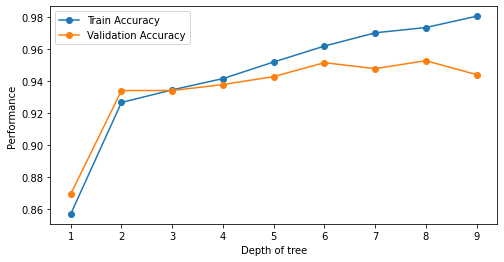

In [ ]:
# Plotting the Accuracy
plt.figure(figsize=(8,4))
plt.plot(frame['max_depth'], frame['train_acc'], marker ='o',label = 'Train Accuracy')
plt.plot(frame['max_depth'], frame['valid_acc'], marker ='o',label = 'Validation Accuracy')
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend()
plt.show()

**Checking the depth of tree**

In [ ]:
# Creating model for Decision Classifier
jb_model = DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 25, random_state = 10)

In [ ]:
# fitting the model
jb_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [ ]:
# Training score
jb_model.score(x_train,y_train)

0.9630552096305521

In [ ]:
# validating score
jb_model.score(x_valid,y_valid)

0.9551681195516812

In [ ]:
decision_tree = tree.export_graphviz(jb_model,out_file='tree.dot',feature_names=x_train.columns,max_depth=2,filled=True)

In [ ]:
# Converting the file format to PNG
!dot -Tpng tree.dot -o tree.png

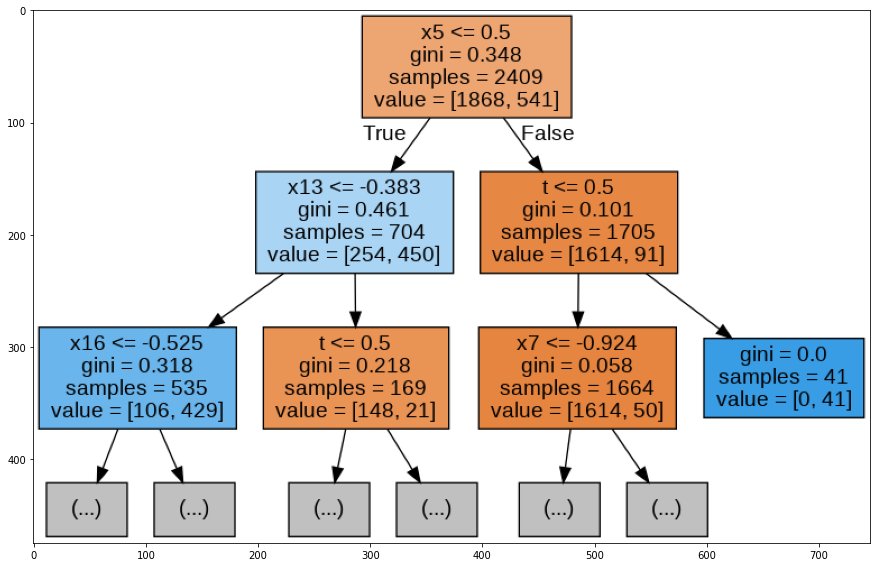

In [ ]:
# Plotting The Decision Tree
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)
plt.show()

**5A**

In [ ]:
!pip install econml

     |████████████████████████████████| 3.3 MB 26.6 MB/s 
     |████████████████████████████████| 77 kB 6.9 MB/s 
     |████████████████████████████████| 123 kB 72.8 MB/s 
     |████████████████████████████████| 356 kB 55.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491651 sha256=9f443deaa6b7ec056503134629c6333e902ac1fdccaed25ebb33719ed76cc868
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [ ]:
from econml.metalearners import XLearner
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
